## KNN

In order to account for positional discrepencies, we use KNN classification to separate each Player position by the points, rebounds, and assists, Blocks Per Game (BLK), Minutes per Game (MP), Effective Field Goal Percentage (eFGPercentage), and Age. 

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [223]:
data = "/Users/hamzah/Desktop/consolidated_players_dataset.csv"


# Read dataset to pandas dataframe
dataset = pd.read_csv(data)
datacolumns = pd.concat([dataset['PTS'], dataset['TRB'], dataset['AST'], dataset['BLK'], dataset['MP'], dataset['eFGPercentage'],dataset['Age'], dataset['Pos']], axis = 1)

In [224]:
datacolumns.head()

,PTS,TRB,AST,BLK,MP,eFGPercentage,Age,Pos
0,30.4,5.4,8.8,0.7,35.4,0.54,28,SG
1,13.1,4.5,1.5,0.5,25.4,0.45,20,SF
2,1.7,0.9,0.1,0.2,5.9,0.47,22,C
3,11.5,4.2,4.8,0.2,31.4,0.61,30,SF
4,2.3,2.0,0.5,0.1,7.0,0.41,20,PF


In [225]:
X = datacolumns.iloc[:, :-1].values
y = datacolumns.iloc[:, 7].values


In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [234]:
y_pred = classifier.predict(X_test)

In [235]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  7  0  2  0]
 [ 5 11  1  2  2]
 [ 1  1 15  0  3]
 [ 0 10  1  6  2]
 [ 1  4  7  6 14]]
              precision    recall  f1-score   support

           C       0.77      0.73      0.75        33
          PF       0.33      0.52      0.41        21
          PG       0.62      0.75      0.68        20
          SF       0.38      0.32      0.34        19
          SG       0.67      0.44      0.53        32

    accuracy                           0.56       125
   macro avg       0.55      0.55      0.54       125
weighted avg       0.59      0.56      0.56       125



The results show that our KNN algorithm was able to classify all the records in the test set with 56% accuracy.

In [231]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

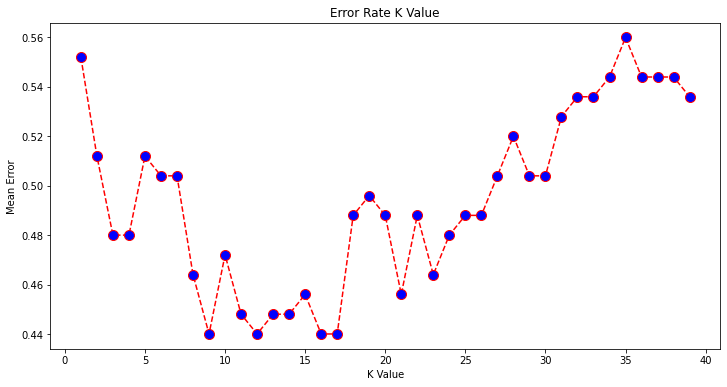

In [232]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The mean error is minimized when the K values are 9, 12, 16, or 17 .